In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from sklearn.metrics import mean_squared_error,r2_score

In [25]:
data_files=['Amazon','AMD','Apple','Cisco','Meta','Microsoft','Netflix','Qualcomm','Starbucks','Tesla']

In [26]:
data=[]

for i in data_files:
    temp=pd.read_csv('Dataset/{}.csv'.format(i),parse_dates=True,index_col=0,usecols=['Date','Close/Last'])
    temp.sort_index(ascending=True,inplace=True)
    temp.rename(columns={'Close/Last':"Close"},inplace=True)
    temp.name=i
    data.append(temp)

In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [29]:
mse_errors=[]
mape_errors=[]
forecast=[]

In [32]:
def ForestReg(df):
    test=30
    df['Lag_1'] = df['Close'].shift(1)
    df['Lag_2'] = df['Close'].shift(2)
    df['Lag_3'] = df['Close'].shift(3)
    df['Lag_4'] = df['Close'].shift(4)
    df['Lag_5'] = df['Close'].shift(5)
    df['Lag_6'] = df['Close'].shift(6)
    df['Lag_7'] = df['Close'].shift(7)
    
    df.dropna(inplace=True)
    Xtrain=df.iloc[:-test,1: ]
    Xtest=df.iloc[-test:,1:]
    Ytrain=df.iloc[:-test,0 ]
    Ytest=df.iloc[-test:,0 ] 
    

    model = RandomForestRegressor(n_estimators=100)
    model.fit(Xtrain,Ytrain)
    result=model.predict(Xtest)
    
    plt.plot(Ytest.values,label='actual')
    plt.plot(result,label='predicted')
    plt.legend(loc='best')
    plt.show()
    
    #one-step forecast
    step=np.array(Ytest[-7:].values[::-1])
    forecast=model.predict(pd.DataFrame(step).T)
    return mean_squared_error(result,Ytest),mean_absolute_percentage_error(result,Ytest),forecast[0]

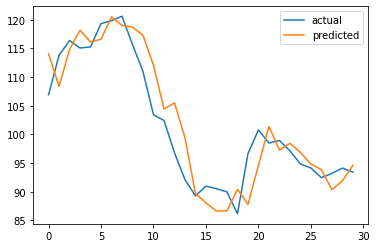

C:\Users\python\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


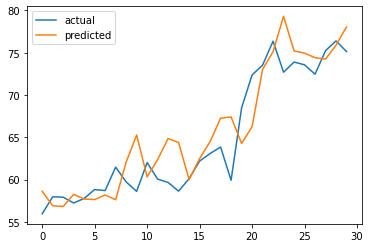

C:\Users\python\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


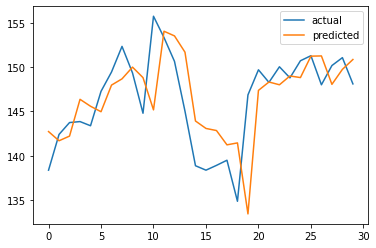

C:\Users\python\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


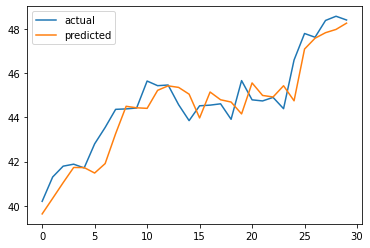

C:\Users\python\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


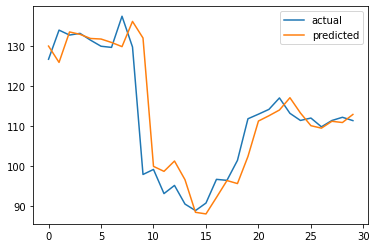

C:\Users\python\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


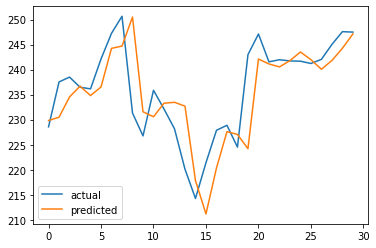

C:\Users\python\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


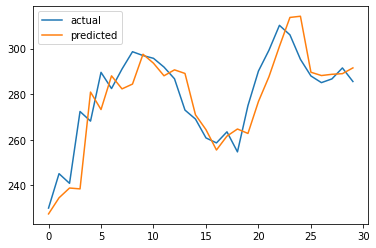

C:\Users\python\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


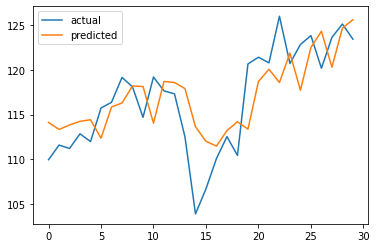

C:\Users\python\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


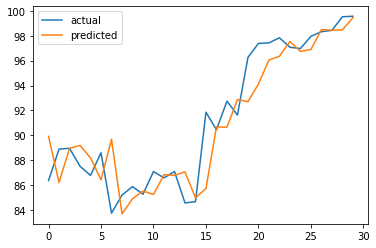

C:\Users\python\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


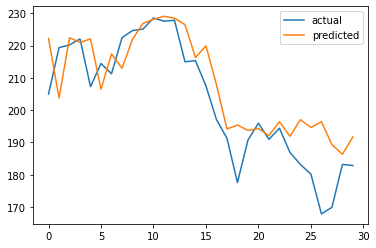

C:\Users\python\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [33]:
for i in data:
    mse,mape,f=ForestReg(i.copy())
    mse_errors.append(mse)
    mape_errors.append(mape)
    forecast.append(f)
    

In [34]:
df=pd.DataFrame({"mse":mse_errors,"mape":mape_errors,"one-step forecast":forecast},index=data_files)

In [35]:
df

,mse,mape,one-step forecast
Amazon,18.752544,0.034539,93.7436
AMD,11.095214,0.038247,75.6131
Apple,18.734753,0.022075,149.6624
Cisco,0.698281,0.014916,48.1141
Meta,54.743348,0.035529,111.4546
Microsoft,44.794538,0.019916,247.5577
Netflix,115.359491,0.029511,286.3543
Qualcomm,14.834831,0.026519,123.7609
Starbucks,5.027788,0.017811,99.6613
Tesla,114.018247,0.038982,194.1168
